# Quantum Random Number Generation

*There are many classical methods that can be used for simulate randomness, but none are truly random. Instead, they are pseudorandom number generators. They produce an output by taking a definite input and processing it in a deterministic way. These inputs are chosen such that the result appears random, and the processing is usually designed to accentuate this. But nevertheless, if you knew what was going on under the hood, you'd know exactly what random numbers would come out.*

*For example, suppose we take an extremely precise measure of the time at which the random number was asked for. We could then look at the last digit (which changes most quickly), and assign our heads or tails depending on whether this is even or odd. Slight fluctations in the speed of our process will result in random seeming numbers.*

Flip 1  (system time = 1734695712.4551017)
Flip 2  (system time = 1734695712.455206)
Flip 3  (system time = 1734695712.4552166)
Flip 4  (system time = 1734695712.4552228)
Flip 5  (system time = 1734695712.4552279)
Flip 6  (system time = 1734695712.455233)
Flip 7  (system time = 1734695712.4552379)
Flip 8  (system time = 1734695712.4552426)
Flip 9  (system time = 1734695712.4552474)
Flip 10  (system time = 1734695712.4552524)
Flip 11  (system time = 1734695712.455258)
Flip 12  (system time = 1734695712.4552624)
Flip 13  (system time = 1734695712.4552677)
Flip 14  (system time = 1734695712.455272)
Flip 15  (system time = 1734695712.4552765)
Flip 16  (system time = 1734695712.4552815)
Flip 17  (system time = 1734695712.455286)
Flip 18  (system time = 1734695712.4552906)
Flip 19  (system time = 1734695712.4552953)
Flip 20  (system time = 1734695712.4553)
Flip 21  (system time = 1734695712.4553046)
Flip 22  (system time = 1734695712.4553094)
Flip 23  (system time = 1734695712.455314)
Flip 2

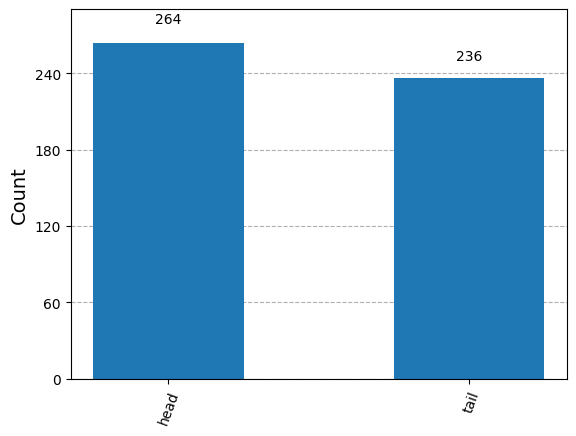

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

result = {'head': 0,
          'tail': 0}

for n in range(500):
    t = str(time.time())
    print('Flip '+str(n+1)+'  (system time = ' + t + ')')
    if int(t[-1])%2==0:
        result['head'] +=1
    else:
        result['tail'] +=1

plot_histogram(result)


We can solve these problems using the most genuine source of randomness that we know: measurements of quantum superpositions. 

For the moment, there is not a proved theory to predict the output state of a qubit after measurement. The result is completely undefined before the moment of measurement. This means we can use quantum computers for the ultimate coin flip.

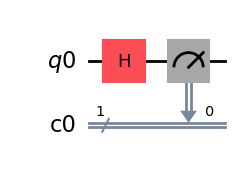

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(1) # qubits
c = ClassicalRegister(1) # classical bits
circ = QuantumCircuit(q, c)

circ.h(q[0])

circ.measure(q,c)
display(circ.draw("mpl"))

{'0': 491, '1': 533}


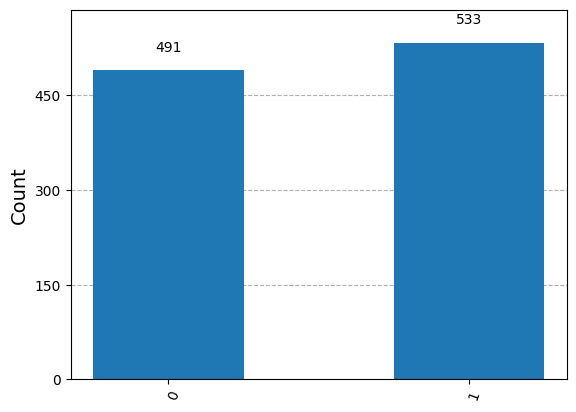

In [4]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

plot_histogram(counts)


# Non-coin random

{'111': 117, '011': 133, '100': 122, '010': 124, '000': 145, '101': 134, '001': 120, '110': 129}


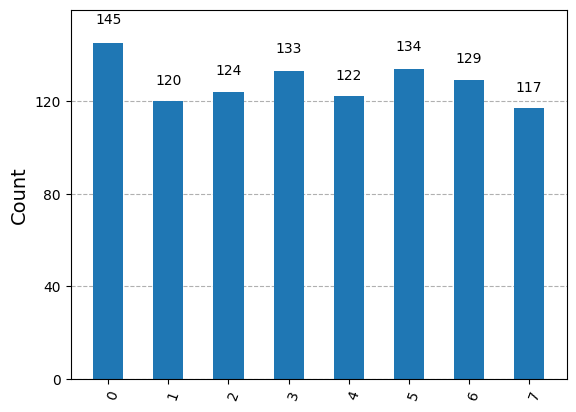

In [5]:
n = 3

q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q, c)

# Uniform superposition
for j in range(n):
    circ.h(q[j])
    
circ.measure(q,c)

circ.draw(output='mpl')

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

int_counts = {}
for bitstring in counts:
    int_counts[int(bitstring,2)] = counts[bitstring]

plot_histogram(int_counts)

---

## $R_X$ rotation 

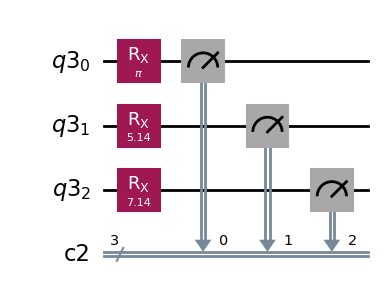

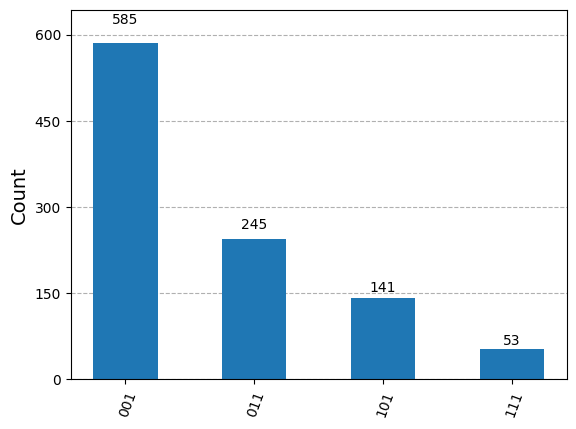

In [6]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)

for i in range(n):
    circ.rx(np.pi + 2*i, q[i])
    
circ.measure(q,c)

display(circ.draw("mpl"))

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
counts = result.get_counts()

plot_histogram(counts)

## $R_Y$ rotation

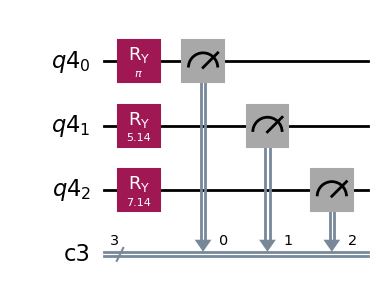

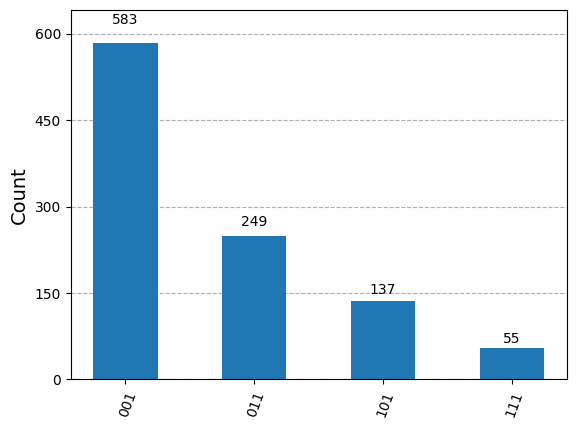

In [7]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)

for i in range(n):
    circ.ry(np.pi + 2*i, q[i])
    
circ.measure(q,c)

display(circ.draw("mpl"))

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
counts = result.get_counts()

plot_histogram(counts)

## $R_Z$ rotation

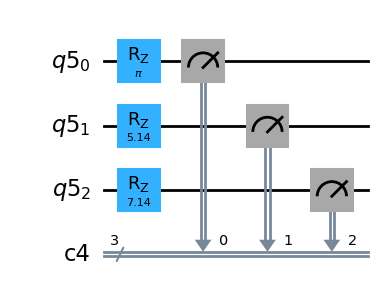

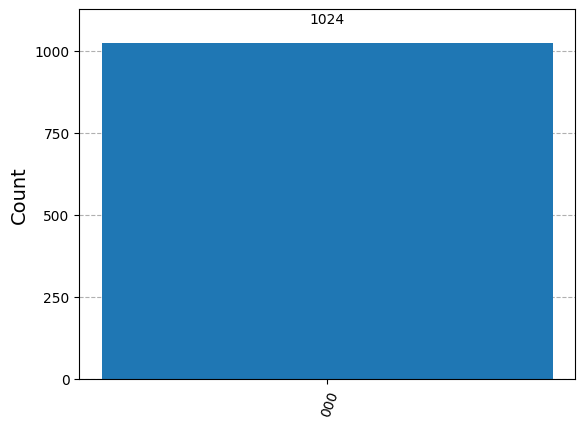

In [8]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)

for i in range(n):
    circ.rz(np.pi + 2*i, q[i])
    
circ.measure(q,c)

display(circ.draw("mpl"))

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
counts = result.get_counts()

plot_histogram(counts)

The z-rotation only adds a global phase in each qubit, since they are initializated in |000> this is just exp(i phi)|000>.

## R_X rotation to the max entangled state

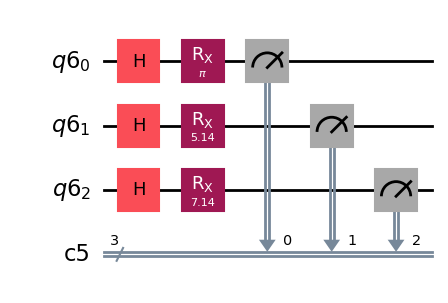

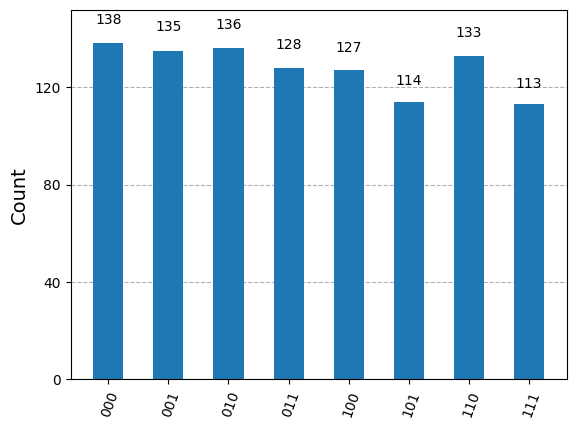

In [9]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)

for i in range(n):
    circ.h(i)
    circ.rx(np.pi + 2*i, q[i])
    
circ.measure(q,c)

display(circ.draw("mpl"))

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
counts = result.get_counts()

plot_histogram(counts)

## R_Z rotation to the max entangled state

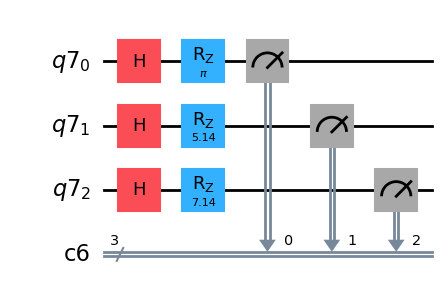

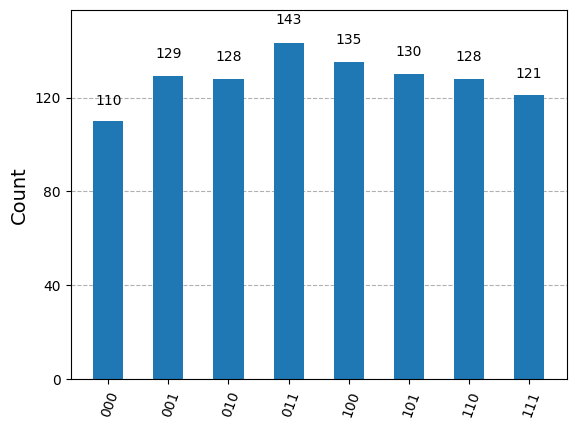

In [10]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)

for i in range(n):
    circ.h(i)
    circ.rz(np.pi + 2*i, q[i])
    
circ.measure(q,c)

display(circ.draw("mpl"))

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
counts = result.get_counts()

plot_histogram(counts)

## R_Y rotation to the max entangled state

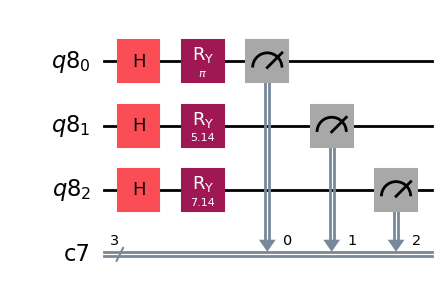

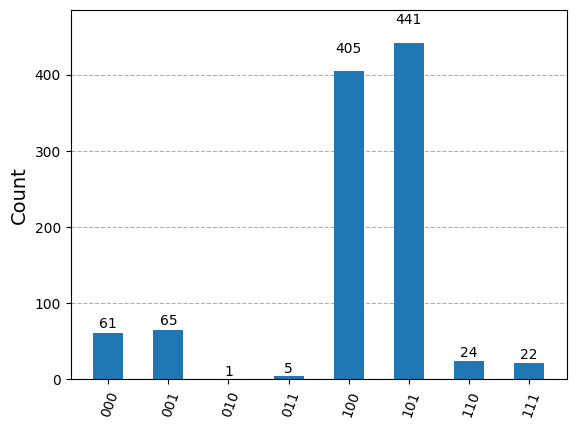

In [11]:
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)

for i in range(n):
    circ.h(i)
    circ.ry(np.pi + 2*i, q[i])
    
circ.measure(q,c)

display(circ.draw("mpl"))

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
counts = result.get_counts()

plot_histogram(counts)